In [10]:
import numpy as np
from visualizer import Field, Adventurer

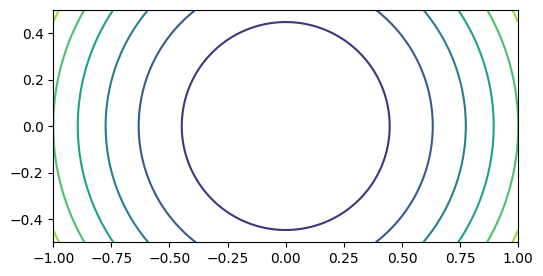

In [11]:
def x2_y2(x, y):
    return x ** 2 + y ** 2
# SGDに強い関数
def anti_SGD(x, y):
    return x ** 2 / 20 + y ** 2
# フィールドの定義
field = Field(
    x2_y2,   # フィールドの高さを決める関数
    (-1, 1),     # xの範囲
    (-0.5, 0.5)  # yの範囲
)

# フィールドをプロットする
field.plot()

In [2]:
class SGD:

    """確率的勾配降下法（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 


In [3]:
class Momentum:

    """Momentum SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]

In [26]:
class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

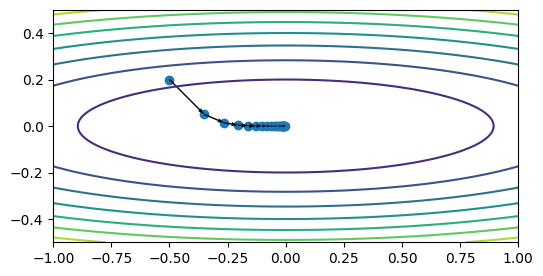

In [50]:
# SGDに強いフィールド
field = Field(anti_SGD, (-1, 1), (-0.5, 0.5))

# さっきのフィールドで可視化してみる
adventurer2 = Adventurer(-0.5, 0.2)

# AdaGradを使う
momentum = AdaGrad(lr=)

# momentumで最適化
adventurer2.optimize(field, momentum)

adventurer2.route

field.plot(adventurer2.route)

In [46]:
class RMSprop:

    """RMSprop"""

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        #AdaGradを参考に実装してみよう

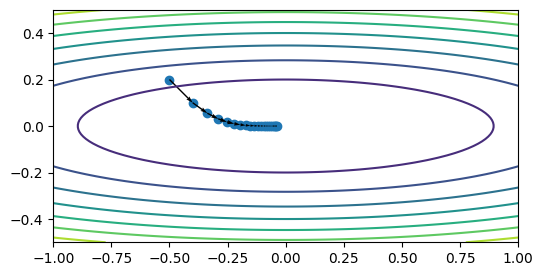

In [49]:
# SGDに強いフィールド
field = Field(anti_SGD, (-1, 1), (-0.5, 0.5))

# さっきのフィールドで可視化してみる
adventurer2 = Adventurer(-0.5, 0.2)

# RMSPropを使う
momentum = RMSprop(lr=0.01)

# momentumで最適化
adventurer2.optimize(field, momentum)

adventurer2.route

field.plot(adventurer2.route)

In [5]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

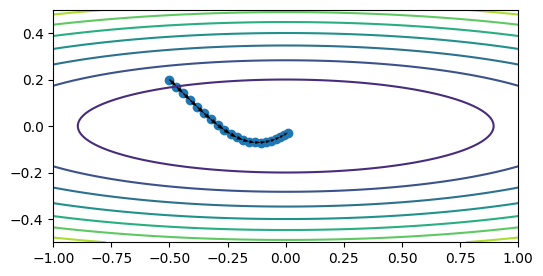

In [36]:
# SGDに強いフィールド
field = Field(anti_SGD, (-1, 1), (-0.5, 0.5))

# さっきのフィールドで可視化してみる
adventurer2 = Adventurer(-0.5, 0.2)

# Adamを使う
momentum = Adam(lr=)

# momentumで最適化
adventurer2.optimize(field, momentum)

adventurer2.route

field.plot(adventurer2.route)

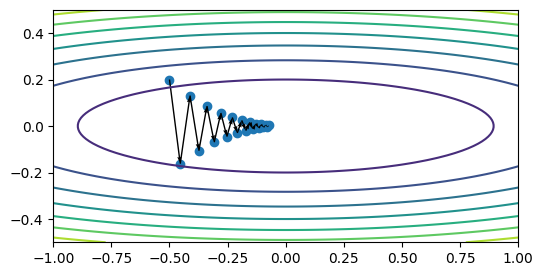

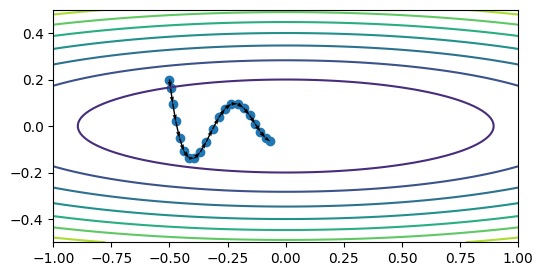

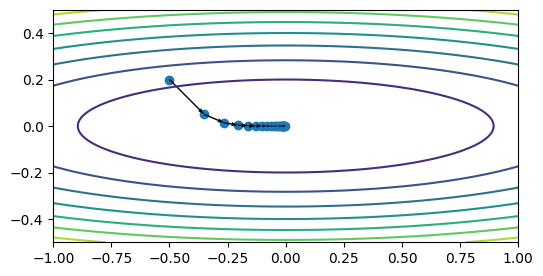

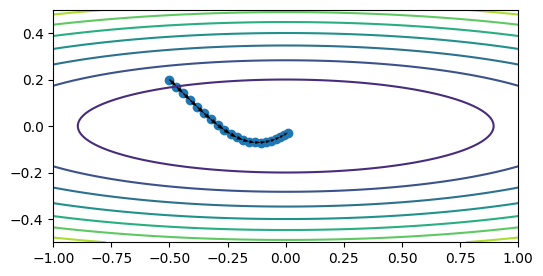

In [41]:
methods=[SGD(),Momentum(),AdaGrad(),Adam()]
for method in methods:
	# SGDに強いフィールド
	field = Field(anti_SGD, (-1, 1), (-0.5, 0.5))

	# さっきのフィールドで可視化してみる
	adventurer2 = Adventurer(-0.5, 0.2)

	adventurer2.optimize(field,method)

	adventurer2.route

	field.plot(adventurer2.route)

===========iteration:0===========
SGD:2.487066743690966
Momentum:2.441676314483894
AdaGrad:2.327930315492758
Adam:2.2214351616352657
===========iteration:100===========
SGD:1.4914457242948431
Momentum:0.35748736073673276
AdaGrad:0.1510916899656681
Adam:0.27274546008498435
===========iteration:200===========
SGD:0.878809173440287
Momentum:0.3930904074178838
AdaGrad:0.13578271130552294
Adam:0.2785197429335402
===========iteration:300===========
SGD:0.5246986401401703
Momentum:0.16794847667175214
AdaGrad:0.07300451732486049
Adam:0.12262841456226833
===========iteration:400===========
SGD:0.43737404028845817
Momentum:0.2072945268297062
AdaGrad:0.0745868281008634
Adam:0.10118647641616921
===========iteration:500===========
SGD:0.3983928717381016
Momentum:0.15295817908725107
AdaGrad:0.07682827319732197
Adam:0.11294347760945797
===========iteration:600===========
SGD:0.38037388790255694
Momentum:0.1399096795631462
AdaGrad:0.050117991154673934
Adam:0.07139625395505957
===========iteration:700=

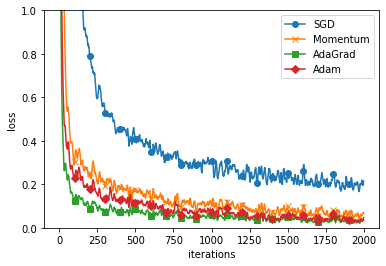

In [42]:
import matplotlib.pyplot as plt
from mnist import load_mnist
from util import smooth_curve
from multi_layer_net import MultiLayerNet


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()